In [89]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [6]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [7]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [9]:
df.shape

(16719, 16)

In [10]:
df_clean = df.dropna(subset=['Name','Platform','Year_of_Release','Genre','Publisher','Critic_Score','Critic_Count','User_Score','User_Count','Developer','Rating'])

In [12]:
df_clean.shape

(6825, 16)

In [56]:
growth = df_clean.drop(columns = ['Genre', 'Name','Platform','NA_Sales','EU_Sales', 'JP_Sales','NA_Sales', 'Other_Sales','Critic_Score','Critic_Count','User_Score','User_Count','Developer','Rating'])
growth

,Year_of_Release,Publisher,Global_Sales
0,2006.0,Nintendo,82.53
2,2008.0,Nintendo,35.52
3,2009.0,Nintendo,32.77
6,2006.0,Nintendo,29.80
7,2006.0,Nintendo,28.92
...,...,...,...
16667,2001.0,NewKidCo,0.01
16677,2002.0,Midway Games,0.01
16696,2014.0,Konami Digital Entertainment,0.01
16700,2011.0,Destineer,0.01


In [ ]:
growth['Publisher'].unique()

In [33]:
nintendo = growth[growth['Publisher'] == 'Nintendo']
ea = growth[growth['Publisher'] == 'Electronic Arts']
activision = growth[growth['Publisher'] == 'Activision']
sony = growth[growth['Publisher'] == 'Sony Computer Entertainment']

Text(0.5, 1.0, 'Sony Sales Growth')

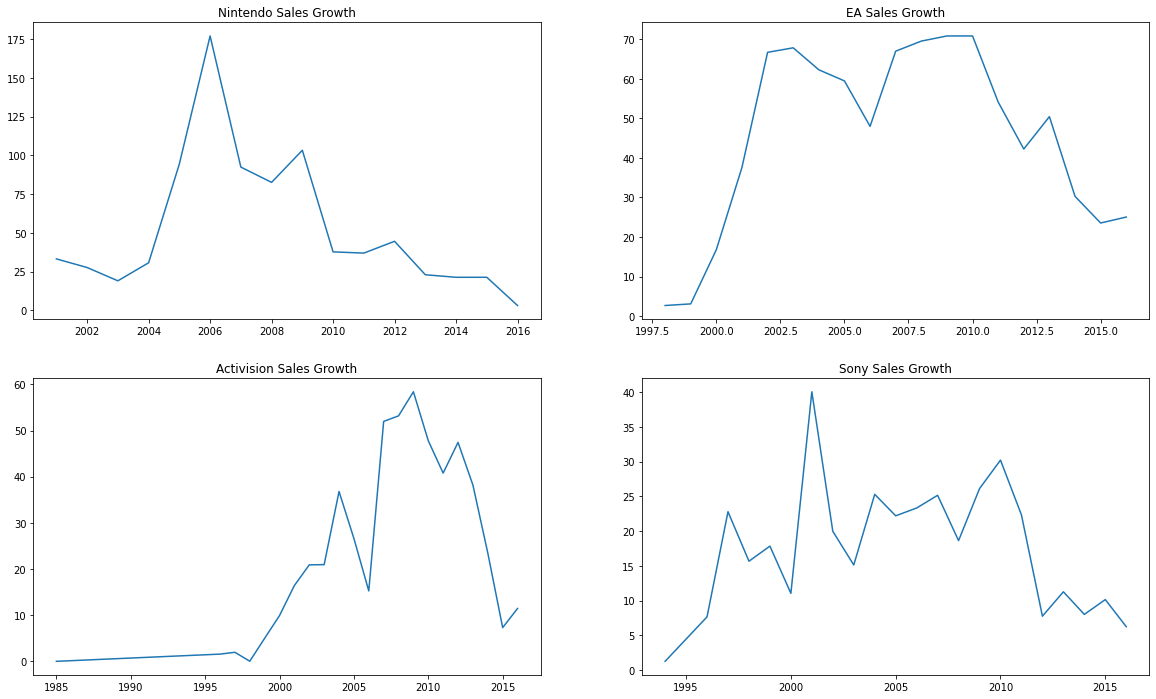

In [34]:
fig, ax = plt.subplots(2,2,figsize=(20,12))

nintendo = nintendo.groupby('Year_of_Release').sum()
ea = ea.groupby('Year_of_Release').sum()
activision = activision.groupby('Year_of_Release').sum()
sony = sony.groupby('Year_of_Release').sum()

ax[0,0].plot(nintendo)
ax[0,0].set_title('Nintendo Sales Growth')

ax[0,1].plot(ea)
ax[0,1].set_title('EA Sales Growth')

ax[1,0].plot(activision)
ax[1,0].set_title('Activision Sales Growth')

ax[1,1].plot(sony)
ax[1,1].set_title('Sony Sales Growth')

In [60]:
score = df_clean.drop(columns = ['Year_of_Release','Genre', 'Global_Sales', 'Name','Platform','NA_Sales','EU_Sales', 'JP_Sales','NA_Sales', 'Other_Sales','Critic_Count','User_Count','Developer','Rating'])
score

,Publisher,Critic_Score,User_Score
0,Nintendo,76.0,8.0
2,Nintendo,82.0,8.3
3,Nintendo,80.0,8.0
6,Nintendo,89.0,8.5
7,Nintendo,58.0,6.6
...,...,...,...
16667,NewKidCo,46.0,2.4
16677,Midway Games,81.0,8.8
16696,Konami Digital Entertainment,80.0,7.6
16700,Destineer,61.0,5.8


In [97]:
fig1 = px.pie(values=df_clean["Global_Sales"], names=df_clean["Genre"])
fig1.update_traces(textposition = 'inside',textinfo='percent+label', sort=False, title = "% of Global Game Sales by Genre") 
fig1.show()

In [50]:
platform = df_clean.drop(columns = ['Genre', 'Name','Year_of_Release','Publisher','NA_Sales','EU_Sales', 'JP_Sales','NA_Sales', 'Other_Sales'])
platform = platform.groupby('Platform').count()
platform = platform.sort_values('Global_Sales', ascending=False)
platform = platform.head(10)
platform 

,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Platform,,,,,,,
PS2,1140,1140,1140,1140,1140,1140,1140
X360,858,858,858,858,858,858,858
PS3,769,769,769,769,769,769,769
PC,651,651,651,651,651,651,651
XB,565,565,565,565,565,565,565
Wii,479,479,479,479,479,479,479
DS,464,464,464,464,464,464,464
PSP,390,390,390,390,390,390,390
GC,348,348,348,348,348,348,348


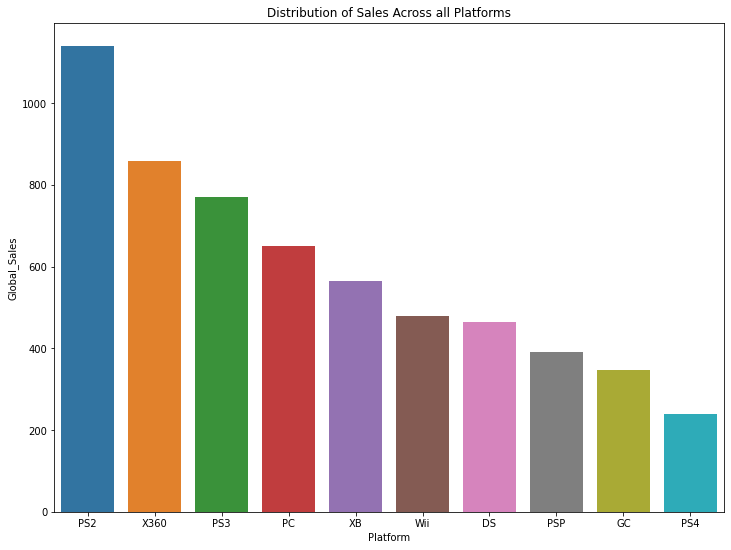

In [98]:
plt.figure(figsize=(12,9))
plt.title('Distribution of Sales Across all Platforms')
sns.barplot(x=platform.index,y=platform['Global_Sales'])